## Explanatory Data Analysis

### Loading the cleaned Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


In [4]:
flight_eda_df = pd.read_csv("/teamspace/studios/this_studio/Flight_delay_analysis/data/cleaned_flight_data.csv")
flight_eda_df.head(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True
2,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134.0,DCA,"Washington, DC",BOS,"Boston, MA",...,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0,False
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590.0,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0,False
5,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223.0,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0,True
6,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107.0,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",...,171.0,176.0,151.0,1061.0,0.0,0.0,0.0,0.0,0.0,False
7,2021-08-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,430.0,MDW,"Chicago, IL",BNA,"Nashville, TN",...,80.0,75.0,59.0,395.0,0.0,0.0,0.0,0.0,0.0,True
8,2019-11-20,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1065.0,BDL,"Hartford, CT",ATL,"Atlanta, GA",...,160.0,133.0,112.0,859.0,0.0,0.0,0.0,0.0,0.0,False
9,2022-05-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1011.0,BWI,"Baltimore, MD",BDL,"Hartford, CT",...,65.0,68.0,53.0,283.0,0.0,0.0,0.0,0.0,0.0,True


In [5]:
flight_eda_df.sample(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
692177,2021-05-11,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,4665.0,SLC,"Salt Lake City, UT",LAS,"Las Vegas, NV",...,85.0,74.0,56.0,368.0,0.0,0.0,0.0,0.0,0.0,False
805957,2021-05-14,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3565.0,STL,"St. Louis, MO",SLC,"Salt Lake City, UT",...,197.0,185.0,169.0,1156.0,0.0,0.0,0.0,0.0,0.0,False
1999840,2019-03-18,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2191.0,BNA,"Nashville, TN",MSY,"New Orleans, LA",...,90.0,80.0,66.0,471.0,0.0,0.0,0.0,0.0,0.0,True
832961,2019-11-09,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,197.0,MFE,"Mission/McAllen/Edinburg, TX",DFW,"Dallas/Fort Worth, TX",...,100.0,97.0,74.0,469.0,0.0,0.0,0.0,0.0,0.0,False
875537,2020-08-09,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5077.0,DEN,"Denver, CO",RIW,"Riverton/Lander, WY",...,74.0,74.0,55.0,296.0,0.0,0.0,0.0,0.0,0.0,False
858668,2021-08-07,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3836.0,CMH,"Columbus, OH",SRQ,"Sarasota/Bradenton, FL",...,140.0,134.0,122.0,869.0,0.0,0.0,0.0,0.0,0.0,True
1130276,2019-06-22,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1660.0,PVD,"Providence, RI",BWI,"Baltimore, MD",...,80.0,68.0,58.0,327.0,0.0,0.0,0.0,0.0,0.0,False
1912323,2023-08-20,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,2328.0,EWR,"Newark, NJ",MSN,"Madison, WI",...,154.0,133.0,113.0,799.0,0.0,0.0,0.0,0.0,0.0,True
1570237,2019-06-12,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,3360.0,DTW,"Detroit, MI",TYS,"Knoxville, TN",...,98.0,105.0,81.0,443.0,0.0,0.0,0.0,0.0,0.0,True
287962,2023-02-12,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,913.0,DAL,"Dallas, TX",SAT,"San Antonio, TX",...,70.0,54.0,45.0,247.0,0.0,0.0,0.0,0.0,0.0,False


In [6]:
flight_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034768 entries, 0 to 2034767
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   fl_date                  object 
 1   airline                  object 
 2   airline_dot              object 
 3   airline_code             object 
 4   dot_code                 int64  
 5   fl_number                float64
 6   origin                   object 
 7   origin_city              object 
 8   dest                     object 
 9   dest_city                object 
 10  crs_dep_time             int64  
 11  dep_time                 int64  
 12  dep_delay                float64
 13  taxi_out                 float64
 14  wheels_off               int64  
 15  wheels_on                int64  
 16  taxi_in                  float64
 17  crs_arr_time             int64  
 18  arr_time                 int64  
 19  arr_delay                float64
 20  cancelled                bool   
 21  diverted

In [7]:
flight_eda_df.isna().sum()

fl_date                    0
airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
target                     0
dtype: int64

In [8]:
# Handling uniformity of data types

# Convert FL_DATE to datetime
flight_eda_df['fl_date'] = pd.to_datetime(flight_eda_df['fl_date'], format='%Y-%m-%d')

# Convert object columns to category
flight_eda_df['airline'] = flight_eda_df['airline'].astype('category')
flight_eda_df['airline_code'] = flight_eda_df['airline_code'].astype('category')
flight_eda_df['airline_dot'] = flight_eda_df['airline_dot'].astype('category')
flight_eda_df['origin'] = flight_eda_df['origin'].astype('category')
flight_eda_df['origin_city'] = flight_eda_df['origin_city'].astype('category')
flight_eda_df['dest'] = flight_eda_df['dest'].astype('category')
flight_eda_df['dest_city'] = flight_eda_df['dest_city'].astype('category')

# Convert time-related columns to four-digit integers (hhmm)
flight_eda_df['crs_dep_time'] = flight_eda_df['crs_dep_time'].astype('Int64')
flight_eda_df['dep_time'] = flight_eda_df['dep_time'].astype('Int64')
flight_eda_df['wheels_off'] = flight_eda_df['wheels_off'].astype('Int64')
flight_eda_df['wheels_on'] = flight_eda_df['wheels_on'].astype('Int64')
flight_eda_df['crs_arr_time'] = flight_eda_df['crs_arr_time'].astype('Int64')
flight_eda_df['arr_time'] = flight_eda_df['arr_time'].astype('Int64')

# Convert binary flags to boolean
flight_eda_df['cancelled'] = flight_eda_df['cancelled'].astype(bool)
flight_eda_df['diverted'] = flight_eda_df['diverted'].astype(bool)

In [9]:
flight_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034768 entries, 0 to 2034767
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                float64       
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             Int64         
 11  dep_time                 Int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               Int64         
 15  wheels_on                Int64         
 16  taxi_in                  float64       
 17  crs_arr_time             In

In [10]:
flight_eda_df['day'] = flight_eda_df["fl_date"].dt.day
flight_eda_df['month'] = flight_eda_df["fl_date"].dt.month
flight_eda_df['day_of_week'] = flight_eda_df["fl_date"].dt.dayofweek
flight_eda_df['year'] = flight_eda_df['fl_date'].dt.year

In [11]:
flight_eda_df.shape

(2034768, 36)

In [12]:
flight_eda_df.columns

Index(['fl_date', 'airline', 'airline_dot', 'airline_code', 'dot_code',
       'fl_number', 'origin', 'origin_city', 'dest', 'dest_city',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time',
       'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'target', 'day',
       'month', 'day_of_week', 'year'],
      dtype='object')

In [13]:
flight_eda_df.head(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week,year
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,0.0,0.0,0.0,0.0,False,9,1,2,2019
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,0.0,0.0,0.0,0.0,True,22,7,4,2022
2,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,0.0,0.0,0.0,0.0,False,23,2,6,2020
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134.0,DCA,"Washington, DC",BOS,"Boston, MA",...,0.0,0.0,0.0,0.0,0.0,False,11,6,6,2023
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590.0,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,0.0,0.0,0.0,0.0,0.0,False,12,2,6,2023
5,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223.0,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,0.0,0.0,0.0,0.0,True,22,8,5,2020
6,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107.0,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",...,0.0,0.0,0.0,0.0,0.0,False,31,7,4,2020
7,2021-08-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,430.0,MDW,"Chicago, IL",BNA,"Nashville, TN",...,0.0,0.0,0.0,0.0,0.0,True,5,8,3,2021
8,2019-11-20,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1065.0,BDL,"Hartford, CT",ATL,"Atlanta, GA",...,0.0,0.0,0.0,0.0,0.0,False,20,11,2,2019
9,2022-05-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1011.0,BWI,"Baltimore, MD",BDL,"Hartford, CT",...,0.0,0.0,0.0,0.0,0.0,True,1,5,6,2022


### 1. Univariate Data Analysis

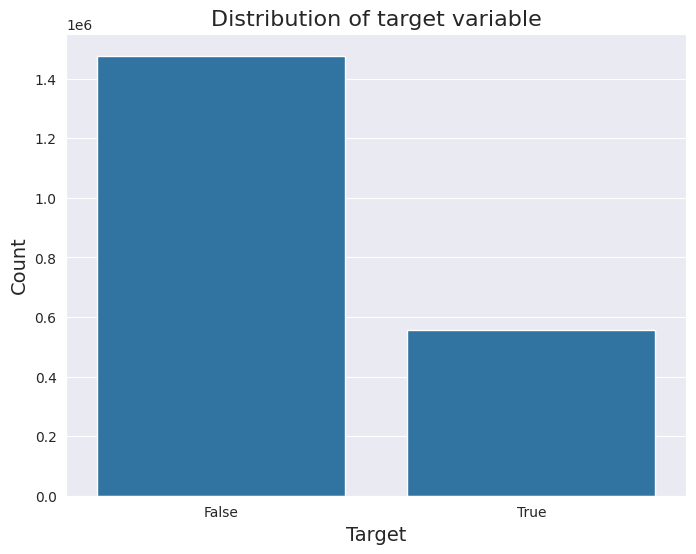

In [17]:
# plotting the target variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=flight_eda_df['target'], ax=ax)
plt.title("Distribution of target variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Target", fontsize=14)
plt.show()

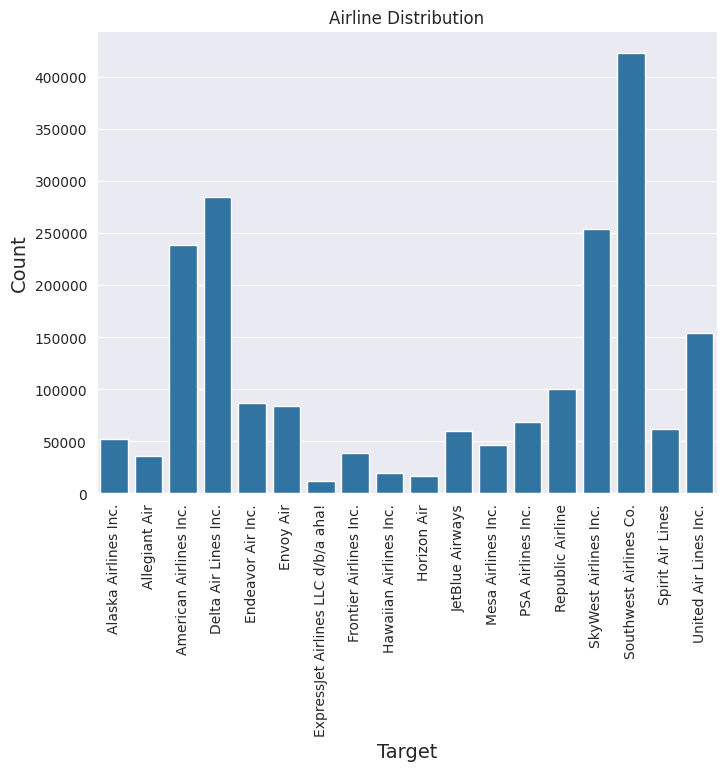

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=flight_eda_df, x='airline')
plt.title('Airline Distribution')
plt.ylabel("Count", fontsize=14)
plt.xlabel("Airline", fontsize=14)
plt.xticks(rotation=90)
plt.show()

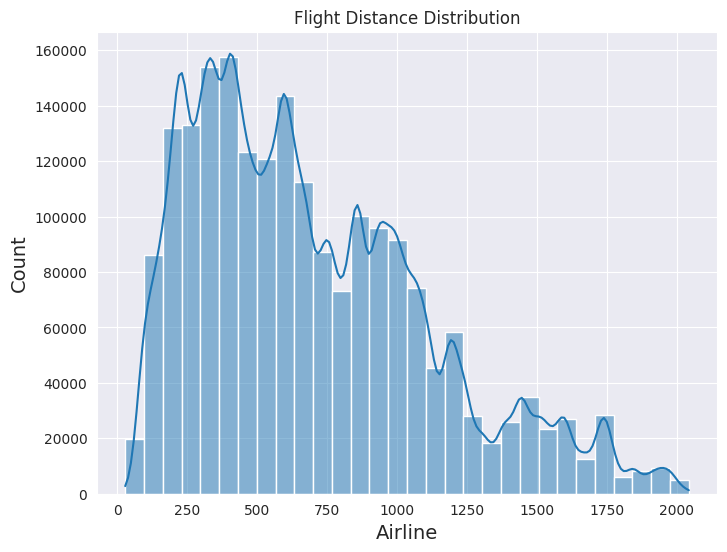

In [21]:
# Distribution of distances
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=flight_eda_df, x='distance', bins=30, kde=True)
plt.title('Flight Distance Distribution')
plt.ylabel("Count", fontsize=14)
plt.xlabel("Airline", fontsize=14)
plt.show()


### 2. Bivariate Data Analysis

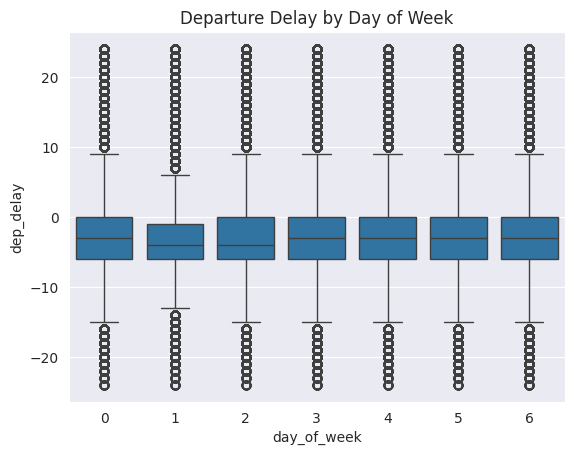

In [17]:
# Delays by day of the week
sns.boxplot(data=flight_eda_df, x='day_of_week', y='dep_delay')
plt.title('Departure Delay by Day of Week', fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Airline", fontsize=14)
plt.show()


/tmp/ipykernel_66077/2537844279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_delays = flight_eda_df.groupby('airline')['arr_delay'].mean().sort_values()


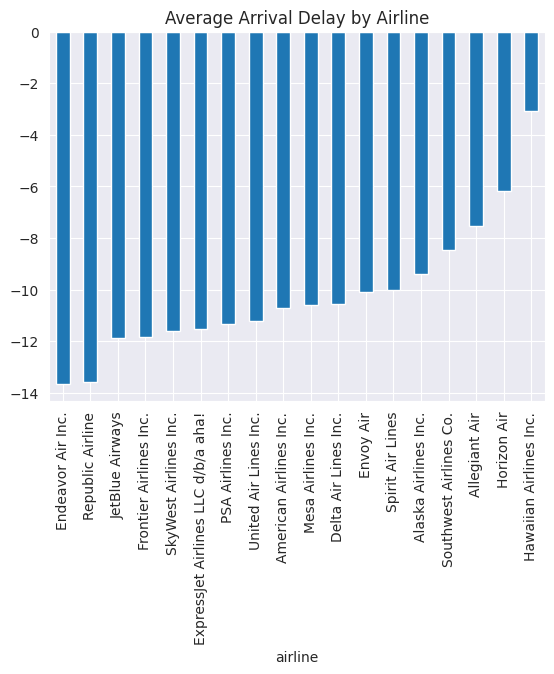

In [18]:
# Airline vs Delays
airline_delays = flight_eda_df.groupby('airline')['arr_delay'].mean().sort_values()
airline_delays.plot(kind='bar', title='Average Arrival Delay by Airline')
plt.show()

Which cause contributes most to delays?

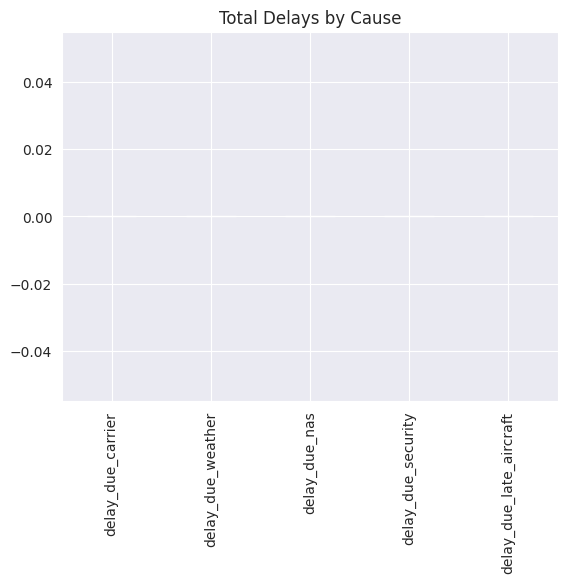

In [22]:
# Delay Causes
delay_causes = ['delay_due_carrier', 'delay_due_weather', 'delay_due_nas', 
                'delay_due_security', 'delay_due_late_aircraft']

delay_summary = flight_eda_df[delay_causes].sum()

delay_summary.plot(kind='bar', title='Total Delays by Cause')

plt.show()

In [ ]:
# plot target variable against lc5
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=nmes_df['lc5 '], hue=nmes_df['target'], ax=ax)
plt.title("Distribution of 'lc5' against target variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("lc5", fontsize=14)
plt.show()

### 3. Mulivariate Data Analysis

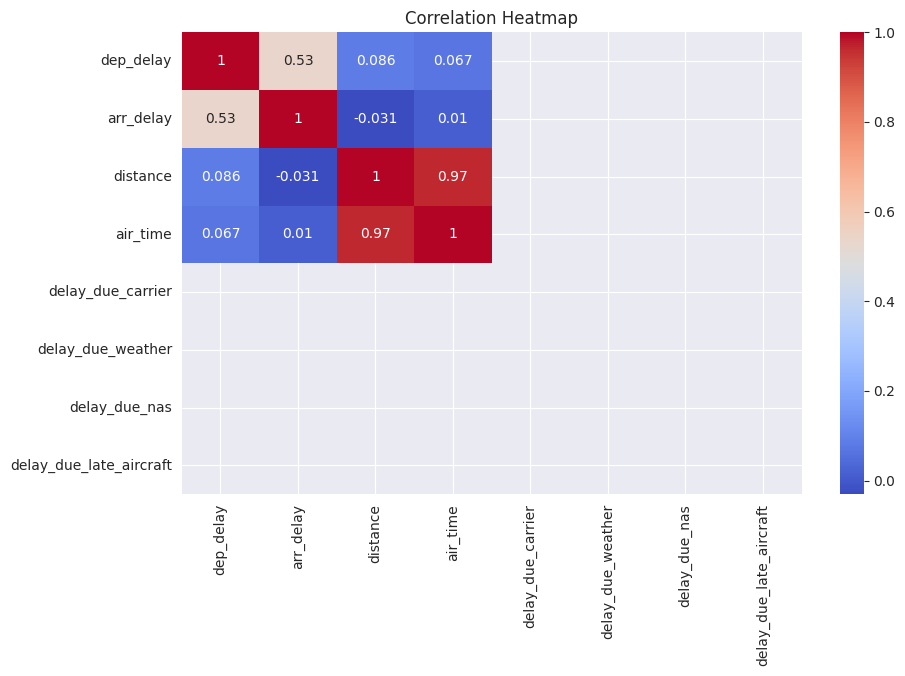

In [23]:
# Correlation heatmap
correlation = flight_eda_df[['dep_delay', 'arr_delay', 'distance', 'air_time',
                  'delay_due_carrier', 'delay_due_weather', 
                  'delay_due_nas', 'delay_due_late_aircraft']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# multivariate analysis

sns.set(style="darkgrid")

corr = flight_eda_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vf, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

ValueError: could not convert string to float: 'United Air Lines Inc.: UA'